In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/diamonds.csv')
print(df.head(10))
print(df['clarity'].unique())

   carat        cut color clarity  depth  table     x     y     z  price
0   0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
1   0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326
2   0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327
3   0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334
4   0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335
5   0.24  Very Good     J    VVS2   62.8   57.0  3.94  3.96  2.48    336
6   0.24  Very Good     I    VVS1   62.3   57.0  3.95  3.98  2.47    336
7   0.26  Very Good     H     SI1   61.9   55.0  4.07  4.11  2.53    337
8   0.22       Fair     E     VS2   65.1   61.0  3.87  3.78  2.49    337
9   0.23  Very Good     H     VS1   59.4   61.0  4.00  4.05  2.39    338
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


# Soal 1: Scatter Plot

Buatlah scatterplot menggunakan Seaborn dari data df di atas, variasikan menggunakan palette yang telah disediakan sehingga didapatkan output sesuai expected.

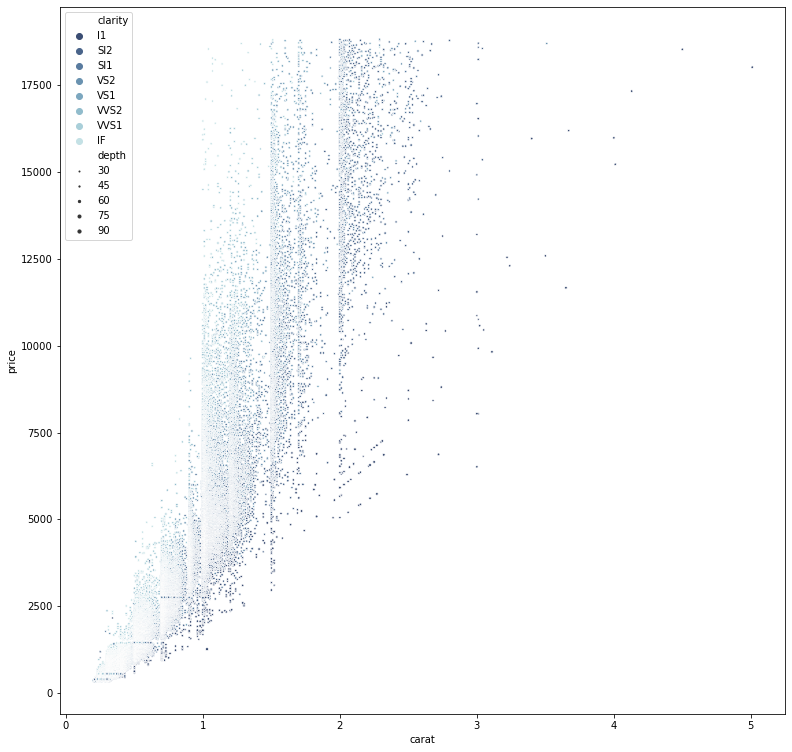

In [50]:
fig, ax = plt.subplots(figsize=(13, 13))
palette="ch:r=-.2,d=.3_r"

#code here
ax = sns.scatterplot(x = 'carat', 
                     y = 'price', 
                     data = df, 
                     hue = 'clarity',
                     hue_order = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],
                     size = 'depth',
                     sizes = (1,10),
                     palette = palette
                     )
plt.show()

In [7]:
sns.scatterplot?

Expected Output:

![alt text](https://drive.google.com/uc?id=1OyzNnrnkJ7TL8DIyh_2O97WuzesyLL7W)

# Soal 2: Facet Grid

Gunakan fungsi hexbin berikut untuk diterapkan pada mapping dari facetgridnya sehingga dihasilkan output sesuai expected.

```
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
```


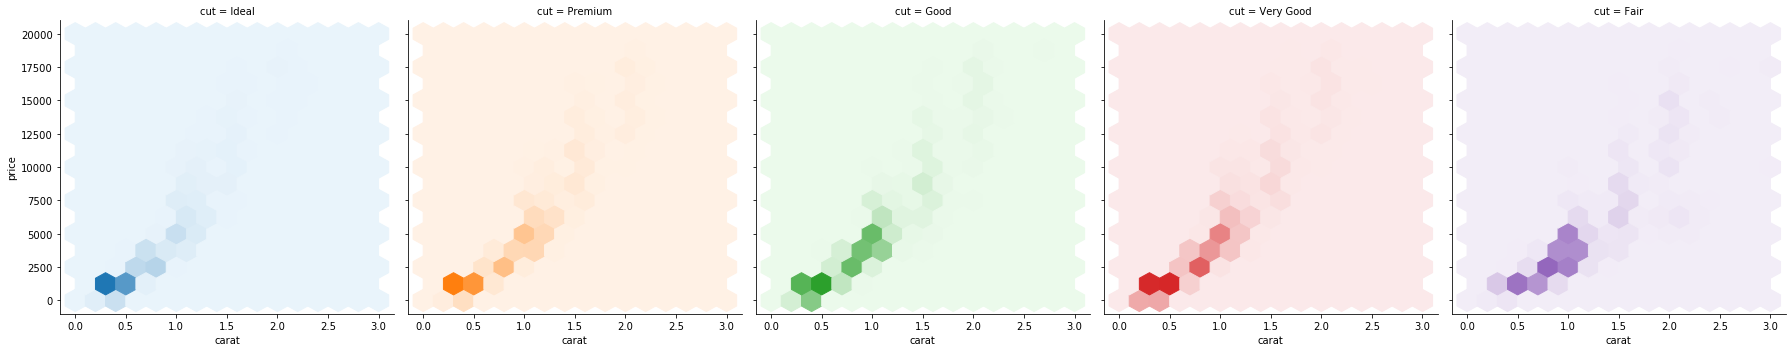

In [34]:
#code here
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
    
grid = sns.FacetGrid(df, col = 'cut', hue = 'cut', height = 5)
gird = grid.map(hexbin, 'carat','price', extent = [0,3,0,20000])

In [27]:
sns.FacetGrid?

In [30]:
grid.map?

Expected Output:

![alt text](https://drive.google.com/uc?id=1ZG6Uu0R_8mPAjpwublowrdUM6Hd1OXkI)

# Soal 3: Pair Plot

Ambil 300 data secara acak dari df, kemudian buat pair plotnya dari 300 data tersebut untuk kolom carat, depth, table, dan price sehingga dihasilkan output sesuai expected.

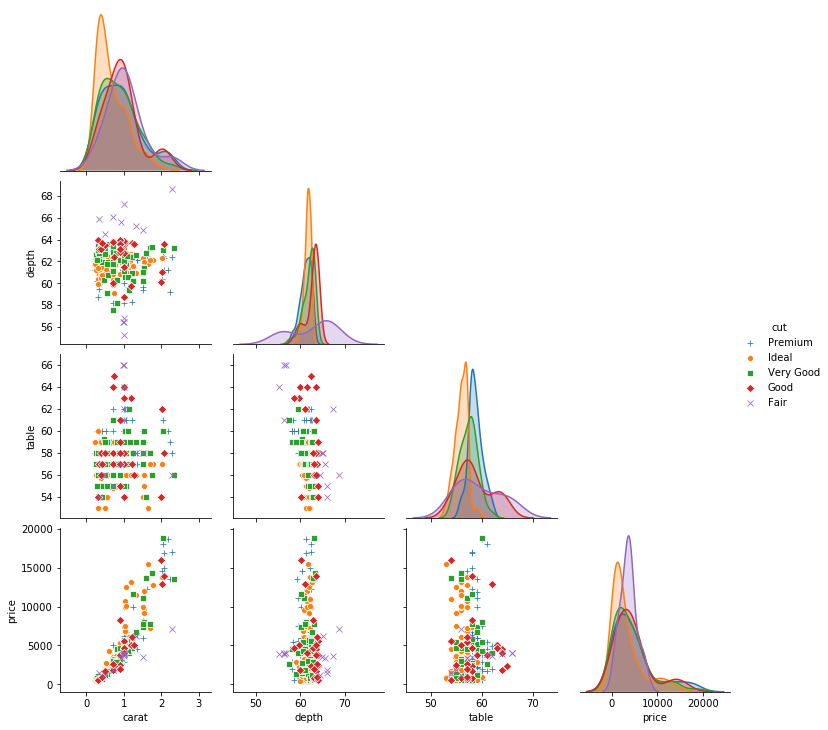

In [67]:
df = df.sample(n=300, random_state=123)

#code here
df_x = df[['carat','depth','table','price','cut']]

g = sns.pairplot(df_x, 
                 hue='cut',
                 hue_order = ['Premium','Ideal','Very Good','Good','Fair'], 
                 markers=['+','o', 's', 'D', 'x'],
                 corner = True)

In [35]:
sns.pairplot?

Expected Output:

![alt text](https://drive.google.com/uc?id=1N3guRLAn5sIhfzzKFdvf1cZpmtEc-cw9)

# Soal 4: Joint Plot

Gunakan data yang sama dengan soal 3 untuk menghasilkan dua visualisasi joint plot antara carat dan price nya sesuai expected output.

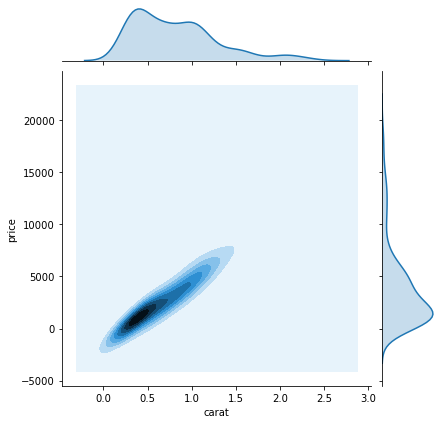

In [70]:
#code here
sns.jointplot('carat','price',data = df, kind = 'kde')

In [73]:
sns.jointplot?

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


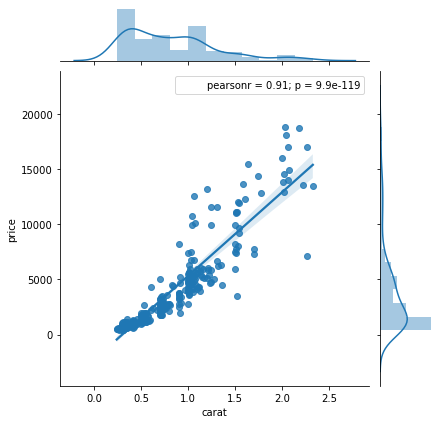

In [77]:
#code here
import scipy.stats 
jointplot = sns.jointplot('carat','price',data = df, kind = 'reg')
jointplot.annotate(scipy.stats.pearsonr)

Expected Output 1:

![alt text](https://drive.google.com/uc?id=1xX5Jq38-rr_oFD-eDRbBYCBA24Nmw2C5)

Expected Output 2:

![alt text](https://drive.google.com/uc?id=1QXY89CXRe1BzU0k7OBrr2fTn8WwIhWHo)